In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define strain rates and temperature labels for RD direction
strain_rates = ['0.0001', '0.001', '0.01', '0.1', '1']  # Strain rates

temperature_sets = {
    '0.0001': ['77.15', '233.15', '298.15', '373.15', '473.15', '573.15', '673.15'],  # Full range of temperatures
    '0.001': ['298.15', '373.15', '473.15', '573.15', '673.15'],  # From 298.15K to 673.15K
    '0.01': ['298.15', '373.15', '473.15', '573.15', '673.15'],  # From 298.15K to 673.15K
    '0.1': ['298.15', '373.15', '473.15', '573.15', '673.15'],  # From 298.15K to 673.15K
    '1': ['298.15']  # Only 298.15K
}

# Create a mapping of temperatures to file paths and colors
temp_file_color_mapping = {
    '77.15': ('Exp_FC_StrRtDpn_TmpDpn(Tmp77.csv', 'yellow'),
    '233.15': ('Exp_FC_StrRtDpn_TmpDpn(Tmp233.csv', 'purple'),  
    '298.15': ('Exp_FC_StrRtDpn_TmpDpn(Tmp298.csv', 'black'),
    '373.15': ('Exp_FC_StrRtDpn_TmpDpn(Tmp373.csv', 'blue'),
    '473.15': ('Exp_FC_StrRtDpn_TmpDpn(Tmp473.csv', 'green'),
    '573.15': ('Exp_FC_StrRtDpn_TmpDpn(Tmp573.csv', 'red'),
    '673.15': ('Exp_FC_StrRtDpn_TmpDpn(Tmp673.csv', 'gray'),
}

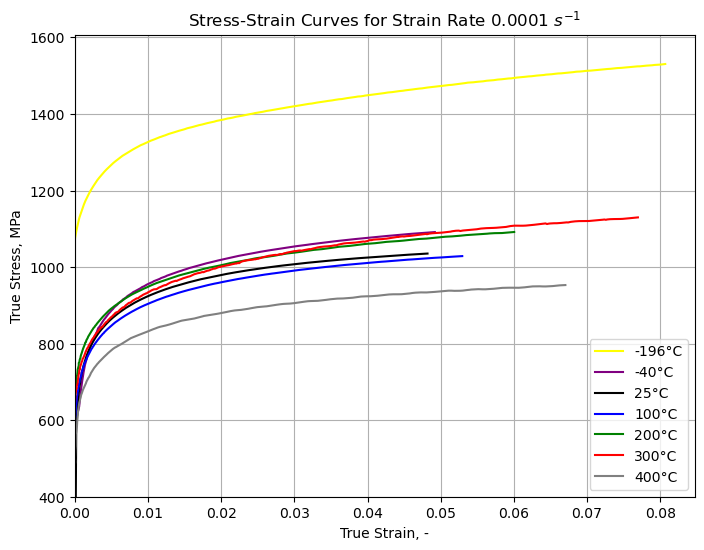

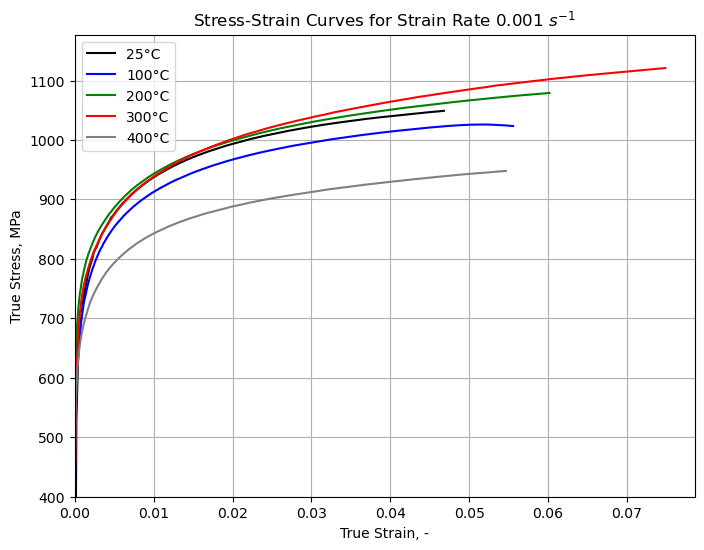

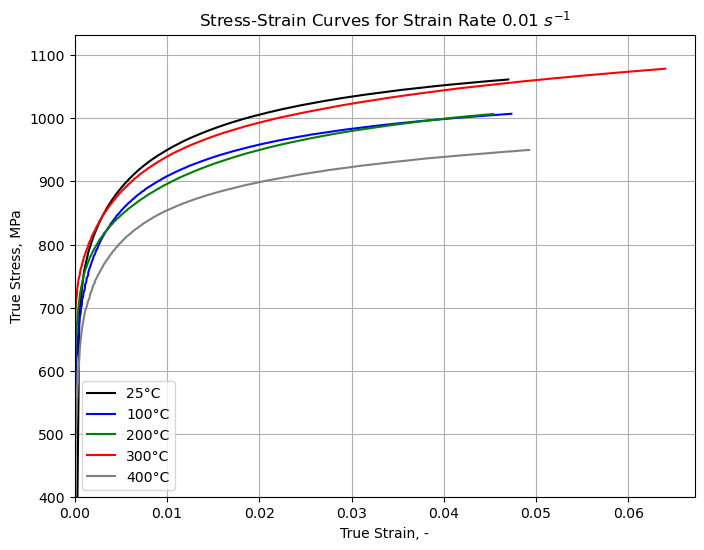

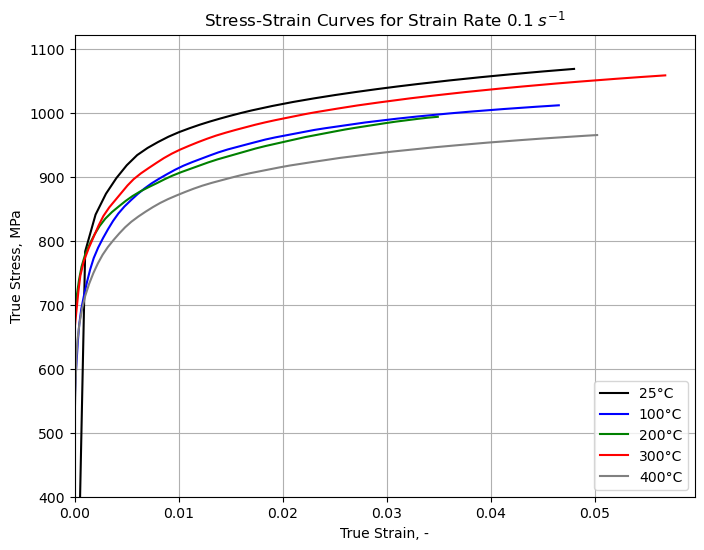

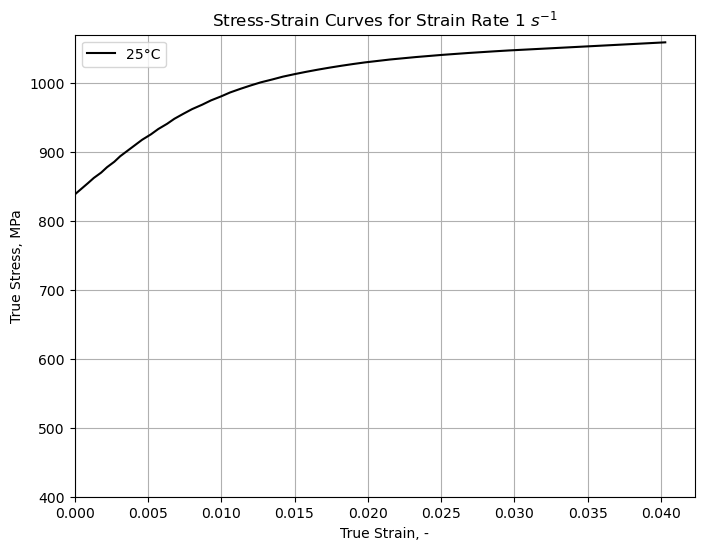

In [11]:
# Loop over the strain rates
for strain_rate in strain_rates:
    plt.figure(figsize=(8, 6))
    available_temperatures = temperature_sets[strain_rate]
    
    # Plot the stress-strain curves for each temperature in RD
    for temperature in available_temperatures:
        file, color = temp_file_color_mapping.get(temperature, (None, None))  # Get the file and color for the temperature
        if file is not None:
            try:
                data = pd.read_csv(file)
                
                strain_column = f'Tmp{temperature}K_StrRt{strain_rate}_RD_E'
                stress_column = f'Tmp{temperature}K_StrRt{strain_rate}_RD_S'
                upper_col = f'Tmp298.15K_StrRt{strain_rate}_RD_U'  # Upper bound column
                lower_col = f'Tmp298.15K_StrRt{strain_rate}_RD_L'  # Lower bound column
                
                if strain_column in data.columns and stress_column in data.columns:
                    # Convert temperature to Celsius for the label
                    temp_celsius = float(temperature) - 273.15
                    plt.plot(data[strain_column], data[stress_column], color=color, label=f'{temp_celsius:.0f}°C')
                else:
                    print(f"Columns {strain_column} or {stress_column} not found in file {file}.")
            except Exception as e:
                print(f"Error reading {file}: {e}")
                
    plt.xlabel('True Strain, -')
    plt.ylabel('True Stress, MPa')
    plt.title(f'Stress-Strain Curves for Strain Rate {strain_rate} $s^{{-1}}$')
    plt.legend()
    plt.xlim(xmin=0) # x-axis range
    #plt.xticks(np.linspace(0,0.2,5)) # x-axis range
    plt.ylim(ymin=400) # y-axis range
    plt.grid()
    plt.savefig(f'Stress_Strain_RD_StrainRate_{strain_rate}.png')
    

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the file
file_path = 'Exp_FC_StrRtDpn_TmpDpn(Tmp298.csv'
data = pd.read_csv(file_path)

# Define strain rates and temperature
strain_rates = ['0.0001', '0.001', '0.01', '0.1']

# Loop over strain rates and plot TD and DD stress-strain curves
for strain_rate in strain_rates:
    # Create a figure for TD
    plt.figure(figsize=(8, 6))
    
    # Extract TD strain and stress columns
    td_strain_col = f'Tmp298.15K_StrRt{strain_rate}_TD_E'
    td_stress_col = f'Tmp298.15K_StrRt{strain_rate}_TD_S'
    td_upper_col = f'Tmp298.15K_StrRt{strain_rate}_TD_U'  # Upper bound column
    td_lower_col = f'Tmp298.15K_StrRt{strain_rate}_TD_L'  # Lower bound column
    
    # Plot TD curve if columns exist
    if td_strain_col in data.columns and td_stress_col in data.columns:
        plt.plot(data[td_strain_col], data[td_stress_col], label='TD Stress 25°C', color='red')

        # Calculate and plot upper and lower bounds
        td_upper_bound = data[td_stress_col] + data[td_upper_col]
        td_lower_bound = data[td_stress_col] - data[td_lower_col]
        
        plt.fill_between(data[td_strain_col], td_lower_bound, td_upper_bound, color='orange', alpha=0.2, label='TD Bounds')
    
    # Customize the TD plot
    plt.xlabel('True Strain, -')
    plt.ylabel('True Stress, MPa')
    plt.title(f'Stress-Strain Curves at Strain Rate {strain_rate} $s^{{-1}}$ for TD')
    plt.legend()
    plt.grid()

    # Save the TD figure
    plt.savefig(f'Stress_Strain_TD_StrainRate_{strain_rate}.png')
    plt.close()  # Close the figure to free up memory

    # Create a figure for DD
    plt.figure(figsize=(8, 6))
    
    # Extract DD strain and stress columns
    dd_strain_col = f'Tmp298.15K_StrRt{strain_rate}_DD_E'
    dd_stress_col = f'Tmp298.15K_StrRt{strain_rate}_DD_S'
    dd_upper_col = f'Tmp298.15K_StrRt{strain_rate}_DD_U'  # Upper bound column
    dd_lower_col = f'Tmp298.15K_StrRt{strain_rate}_DD_L'  # Lower bound column
    
    # Plot DD curve if columns exist
    if dd_strain_col in data.columns and dd_stress_col in data.columns:
        plt.plot(data[dd_strain_col], data[dd_stress_col], label='DD Stress 25°C', color='blue')

        # Calculate and plot upper and lower bounds
        dd_upper_bound = data[dd_stress_col] + data[dd_upper_col]
        dd_lower_bound = data[dd_stress_col] - data[dd_lower_col]
        
        plt.fill_between(data[dd_strain_col], dd_lower_bound, dd_upper_bound, color='orange', alpha=0.2, label='DD Bounds')
    
    # Customize the DD plot
    plt.xlabel('True Strain, -')
    plt.ylabel('True Stress, MPa')
    plt.title(f'Stress-Strain Curves at Strain Rate {strain_rate} $s^{{-1}}$ for DD')
    plt.legend()
    plt.grid()

    # Save the DD figure
    plt.savefig(f'Stress_Strain_DD_StrainRate_{strain_rate}.png')
    plt.close()  # Close the figure to free up memory
